Try

## Load and Inspect Data

In [1]:
import pandas as pd

In [2]:
olympics_events = pd.read_csv("olympics_events.csv")
olympics_events.head()

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37
1,A Lamusi,M,23.0,170.0,60.0,CHN,Judo,Judo Men's Extra-Lightweight,NaN,48
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Football,Football Men's Football,NaN,6
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,36


In [3]:
olympics_events.shape

(271116, 10)

In [4]:
olympics_games = pd.read_csv("olympics_games.csv")
olympics_games.head()

,ID,Year,Season,City
0,0,1896,Summer,Athina
1,1,1900,Summer,Paris
2,2,1904,Summer,St. Louis
3,3,1906,Summer,Athina
4,4,1908,Summer,London


In [5]:
olympics_games.shape

(51, 4)

In [7]:
olympics_merge = pd.merge(olympics_events, olympics_games, left_on="GamesID", right_on="ID").drop('ID', axis=1)
olympics_merge

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,Year,Season,City
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37,1992,Summer,Barcelona
1,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,37,1992,Summer,Barcelona
2,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,37,1992,Summer,Barcelona
3,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,37,1992,Summer,Barcelona
4,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,37,1992,Summer,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Khristos Zoumis,M,NaN,NaN,NaN,GRE,Athletics,Athletics Men's Triple Jump,NaN,0,1896,Summer,Athina
271112,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,SUI,Gymnastics,Gymnastics Men's Horse Vault,Silver,0,1896,Summer,Athina
271113,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,SUI,Gymnastics,Gymnastics Men's Parallel Bars,Silver,0,1896,Summer,Athina
271114,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,SUI,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,0,1896,Summer,Athina


In [8]:
olympics_merge.describe(include='all') #return both instead of only numeric by default

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,Year,Season,City
count,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,39783,271116.000000,271116.000000,271116,271116
unique,134732,2,NaN,NaN,NaN,230,66,765,3,NaN,NaN,2,42
top,Robert Tait McKenzie,M,NaN,NaN,NaN,USA,Athletics,Football Men's Football,Gold,NaN,NaN,Summer,London
freq,58,196594,NaN,NaN,NaN,18853,38624,5733,13372,NaN,NaN,222552,22426
mean,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,NaN,31.481340,1978.378480,NaN,NaN
std,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,NaN,13.701265,29.877632,NaN,NaN
min,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,NaN,0.000000,1896.000000,NaN,NaN
25%,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,NaN,21.000000,1960.000000,NaN,NaN
50%,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,NaN,35.000000,1988.000000,NaN,NaN
75%,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,NaN,43.000000,2002.000000,NaN,NaN


#### _Creating Categorical Variable_

In [9]:
for x in ['Name', 'Sex', 'Nationality', 'Sport', 'Event', 'Medal','Season', 'City']:
    olympics_merge[x]=olympics_merge[x].astype('object')

#### _Separating Categorical and Numeric Variable_

In [10]:
# Find Numerical variable in Data frame.
# This will return a list
num_olympics = [key for key in dict(olympics_merge.dtypes) if dict(olympics_merge.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_olympics = [key for key in dict(olympics_merge.dtypes) if dict(olympics_merge.dtypes)[key] in ['object']]

#Print the data frame
print("Numerical Variable :", num_olympics)
print()
print("Categorical Variable :", cat_olympics)

Numerical Variable : ['Age', 'Height', 'Weight', 'GamesID', 'Year']

Categorical Variable : ['Name', 'Sex', 'Nationality', 'Sport', 'Event', 'Medal', 'Season', 'City']


#### _Convert List to Dataframe_

In [12]:
olympics_num = olympics_merge[num_olympics]
olympics_num.sample(5)             #insert list to dataframe

,Age,Height,Weight,GamesID,Year
42602,62.0,NaN,NaN,11,1932
171960,23.0,162.0,56.0,25,1968
182398,26.0,168.0,73.0,27,1972
142073,23.0,178.0,71.0,44,2004
207952,27.0,NaN,NaN,18,1952


In [13]:
olympics_cat = olympics_merge[cat_olympics]
olympics_cat.sample(5)

,Name,Sex,Nationality,Sport,Event,Medal,Season,City
67088,Larissa Nevierov,F,ITA,Sailing,Sailing Women's One Person Dinghy,NaN,Summer,Sydney
75316,Ivelisse Echevarra,F,PUR,Softball,Softball Women's Softball,NaN,Summer,Atlanta
199510,"Gwendolyn Lenna ""Gwen"" Torrence (-Waller, -Smith)",F,USA,Athletics,Athletics Women's 200 metres,NaN,Summer,Seoul
21900,Ruggero Pertile,M,ITA,Athletics,Athletics Men's Marathon,NaN,Summer,London
171525,Herv d'Encausse,M,FRA,Athletics,Athletics Men's Pole Vault,NaN,Summer,Mexico City


## Wrangling Data

### _Make Summary_

In [14]:
#numerical

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = olympics_num.apply(lambda x: var_summary(x)).T

In [15]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Age,261642.0,9474.0,6686758.0,25.556898,24.0,6.393561,40.877620,10.0,15.0,18.0,19.0,21.0,24.0,28.0,33.0,37.0,48.0,97.0
Height,210945.0,60171.0,36986879.0,175.338970,175.0,10.518462,110.638048,127.0,150.0,158.0,162.0,168.0,175.0,183.0,188.0,193.0,200.0,226.0
Weight,208241.0,62875.0,14723137.0,70.702393,70.0,14.348020,205.865678,25.0,43.0,50.0,54.0,60.0,70.0,79.0,89.0,95.0,114.0,214.0
GamesID,271116.0,0.0,8535095.0,31.481340,35.0,13.701265,187.724665,0.0,2.0,6.0,9.0,21.0,35.0,43.0,48.0,50.0,50.0,50.0
Year,271116.0,0.0,536370060.0,1978.378480,1988.0,29.877632,892.672893,1896.0,1904.0,1920.0,1928.0,1960.0,1988.0,2002.0,2012.0,2016.0,2016.0,2016.0


In [16]:
#categorical

def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts(),x.unique()],
                    index=['N','NMISS','ColumnNames','UniqueValues'])

cat_summary = olympics_cat.apply(lambda x:cat_summary(x)).T

In [17]:
cat_summary

,N,NMISS,ColumnNames,UniqueValues
Name,271116,0,Robert Tait McKenzie 58 Heikki Ilmar...,"[A Dijiang, Mika Lauri Aarnikka, Morten Gjerdr..."
Sex,271116,0,"M 196594 F 74522 Name: Sex, dtype: int64","[M, F]"
Nationality,271116,0,USA 18853 FRA 12758 GBR 12256 ITA ...,"[CHN, FIN, NOR, EST, CHA, CUB, CHI, HUN, ITA, ..."
Sport,271116,0,Athletics 38624 Gymnastics 26707 ...,"[Basketball, Sailing, Equestrianism, Wrestling..."
Event,271116,0,Football Men's Football ...,"[Basketball Men's Basketball, Sailing Men's Tw..."
Medal,39783,231333,Gold 13372 Bronze 13295 Silver 1311...,"[nan, Silver, Gold, Bronze]"
Season,271116,0,Summer 222552 Winter 48564 Name: Season...,"[Summer, Winter]"
City,271116,0,London 22426 Athina ...,"[Barcelona, London, Antwerpen, Paris, Calgary,..."


### _With Outliers_

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

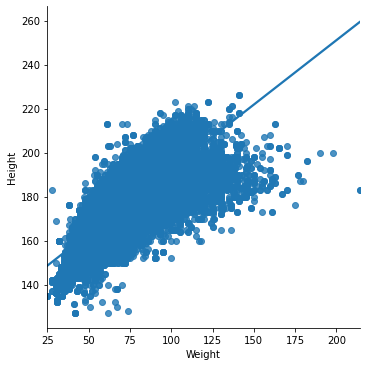

In [19]:
# Seaborn scatter plot with regression line
# sns.lmplot : Include straight line

sns.lmplot(x='Weight', y='Height', data=olympics_num)

### _Handling Outliers_

In [20]:
#Handling Outliers for numerical data - Through function

def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

olympics_num = olympics_num.apply(lambda x: outlier_capping(x))

#### _Check linearity without outliers_

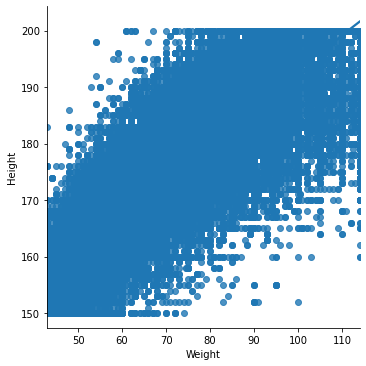

In [21]:
# Seaborn scatter plot with regression line
# sns.lmplot : Include straight line

sns.lmplot(x='Weight', y='Height', data=olympics_num)

<AxesSubplot:xlabel='Height'>

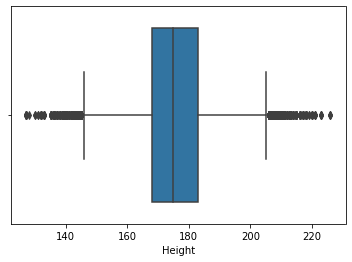

In [22]:
sns.boxplot(olympics_events['Height']) #got outliers to differentiate

<AxesSubplot:xlabel='Height'>

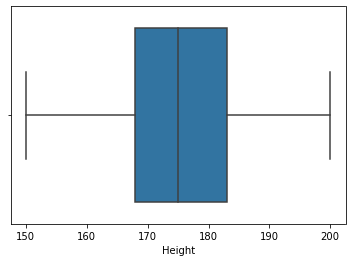

In [23]:
sns.boxplot(olympics_num['Height']) #no outliers anymore

### _Handling Missing Values_

In [24]:
#Handling missings - by Function (Makethe function to treat all data in one shot)

def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

olympics_num = olympics_num.apply(lambda x: Missing_imputation(x))

In [25]:
# replacing na values in Medal with creating not available

olympics_cat["Medal"].fillna("NA", inplace = True)

In [26]:
# Find the total number of missing values in the numerical data i.e custdata_df_num

print ("\nMissing values in numerical data :  ", olympics_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", olympics_cat.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


## Merging Numerical and Categorical Data

In [27]:
olympics = pd.concat([olympics_cat, olympics_num], axis=1).round(1)
olympics.sample(5)

,Name,Sex,Nationality,Sport,Event,Medal,Season,City,Age,Height,Weight,GamesID,Year
203585,Charles Thomas King,M,GBR,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Bronze,Summer,Berlin,25.0,175.3,70.6,13,1936
206137,Roy Mason Staley,M,USA,Athletics,Athletics Men's 110 metres Hurdles,NA,Summer,Berlin,21.0,183.0,77.0,13,1936
146174,Roman Hagara,M,AUT,Sailing,Sailing Mixed Multihull,Gold,Summer,Athina,38.0,171.0,68.0,44,2004
44242,"Helen Newington Wills (-Moody, -Roark)",F,USA,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA,Summer,Los Angeles,26.0,175.3,70.6,11,1932
249588,Julian Joseph Rossi,M,AUS,Boxing,Boxing Men's Light-Welterweight,NA,Summer,Tokyo,22.0,170.0,64.0,23,1964


In [28]:
olympics.columns

Index(['Name', 'Sex', 'Nationality', 'Sport', 'Event', 'Medal', 'Season',
       'City', 'Age', 'Height', 'Weight', 'GamesID', 'Year'],
      dtype='object')

In [29]:
olympics.to_csv('olympicsdone.csv')

In [ ]:
try buat relational database sql

In [ ]:
copy buat visualization

In [31]:
#Lets Import Sqlite and CSV
!pip install ipython-sql

In [32]:
import csv,sqlite3

In [33]:
%load_ext sql

In [42]:
conn= sqlite3.connect('Olympics1.db')  #if no database is found, it creates a new database with
c= conn.cursor()


In [45]:
c.execute("""CREATE TABLE IF NOT EXISTS Events
            (id NUMERIC PRIMARY KEY,
             name TEXT,
             sex TEXT,
             age NUMERIC,
             medal TEXT,
             sport TEXT,
             event TEXT,
             nationality TEXT,
             height NUMERIC,
             weight NUMERIC,
             gamesid NUMERIC
            );""")

In [50]:
with open('cleanedolympics.csv','r') as f:
    dr = csv.DictReader(f)
    #to_db = [(i['name'],i['sex'],i['age'],i['height'],i['weight'],i['event'],
             # i['nationality'],i['sport'],i['medal'],i['gamesid']) for i in dr]

In [51]:
conn.commit()

In [52]:
for row in c.execute("SELECT * FROM cleanedolympics LIMIT 10"):
    print(row)

OperationalError: no such table: cleanedolympics